In [1]:
%pylab inline
import numpy as np
from astropy import units as u
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
from scipy.integrate import odeint, quad
plt.style.use('seaborn-whitegrid')

Populating the interactive namespace from numpy and matplotlib


### 1. Using the Friedmann Equation, find values of $\Omega_m$, $\Omega_r$, and $\Omega_{\lambda}$ that will give rise to:
### a) A Loitering Universe (use a universe with a positive matter density)
### b) A Big Crunch universe
### Plot the results showing the scale factor as a function of time.

Both a loitering universe and a big crunch universe are part of models that are not flat; they depends on curvature, matter density, and dark matter density. Therefore, we need to use a variation of Friedmann's Equation given in Ryden:

(1) $$ (\frac{H(t)}{H_0})^2 = (\frac{\Omega_m}{a(t)^3} + \frac{1-\Omega_m - \Omega_{\Lambda}}{a(t)^2} + \Omega_{\Lambda}) $$

Since we know that $H(t) = \frac{\dot{a}}{a}$, we can rewrite this so:

(2) $$ (\frac{\dot{a}}{a H_0})^2 = (\frac{\Omega_m}{a^3} + \frac{1-\Omega_m - \Omega_{\Lambda}}{a^2} + \Omega_{\Lambda}) $$

Multiplying by $a^2$:

(3) $$ (\frac{\dot{a}}{H_0})^2 = (\frac{\Omega_m}{a} + (1-\Omega_m - \Omega_{\Lambda}) + \Omega_{\Lambda}a^2) $$

And finally solving for $\dot{a}$:

(4) $$  \dot{a} = H_0(\frac{\Omega_m}{a} + (1-\Omega_m - \Omega_{\Lambda}) + \Omega_{\Lambda}a^2)^{1/2}  $$

To be able to numerically solve with quad, we must separate this:

(5) $$ \frac{da}{dt} =  H_0(\frac{\Omega_m}{a} + (1-\Omega_m - \Omega_{\Lambda}) + \Omega_{\Lambda}a^2)^{1/2}$$ 

And then:

(6) $$ dt = \frac{1}{H_0(\frac{\Omega_m}{a} + (1-\Omega_m - \Omega_{\Lambda}) + \Omega_{\Lambda}a^2)^{1/2}}da $$

/Users/camellia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


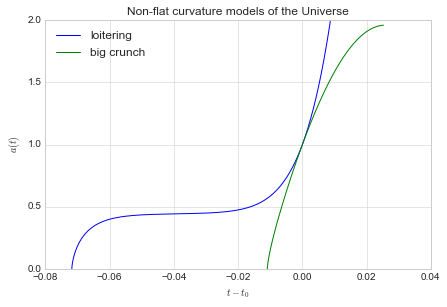

In [27]:
H_0 = 70.0 * (u.km/(u.s * u.Mpc));
def dt(a, omegas):
    m0, L0 = omegas;
    return 1/(H_0.value*np.sqrt((m0/a) + (1 - m0 - L0) + (L0*a**2)));
    
a_space = linspace(0.001,2.0,1000)

t_loitering = [];
t_bigcrunch_forward = [];

#m0 = 0.3, L0 = 1.7134 as given in Ryden for a sample loitering universe
#m0 = 0.3, L0 = -0.3 as given in Ryden for a sample big crunch universe

for val in a_space:
    t = quad(dt,0,val,args=([0.3,1.7134]))[0];
    t_loitering.append(t);
    t2 = quad(dt,0,val,args=([0.3,-0.3]))[0];
    t_bigcrunch_forward.append(t2);

t_0 = quad(dt,0,1,args=([0.3,1.7134]))[0];
t_02 = quad(dt,0,1,args=([0.3,-0.3]))[0];

for idx, val in enumerate(t_loitering):
    t_loitering[idx] = t_loitering[idx] - t_0;

for idx, val in enumerate(t_bigcrunch_forward):
    t_bigcrunch_forward[idx] = t_bigcrunch_forward[idx] - t_02;

fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Non-flat curvature models of the Universe")
ax.set_xlabel("$t-t_0$")
ax.set_ylabel("$a(t)$")

ax.plot(t_loitering,a_space,label="loitering")
ax.plot(t_bigcrunch_forward,a_space,label="big crunch")
ax.legend(loc=2)

Now we notice that, since the solution for a Big Crunch universe is not one-to-one and therefore not a function, we cannot plot the other part of the graph. Since we know it will just reverse and that each side is symmetrical, we can find the negative solution from the maximum value of the scale factor and offset this solution to line up with the first part of the solution.

In [29]:
n = argmax(t_bigcrunch_forward)
T = max(t_bigcrunch_forward)
max_a = a_space[n]
print "The maximum value for the scale factor is:", max_a

The maximum value for the scale factor is: 1.96198098098


/Users/camellia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


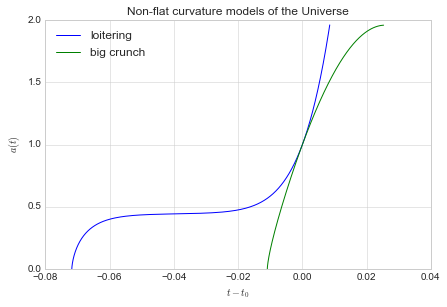

In [30]:
#same plot, just fixing the maximum for the scale factor

a_space = linspace(0.001,max_a,1000)

t_loitering = [];
t_bigcrunch_forward = [];

#m0 = 0.3, L0 = 1.7134 as given in Ryden for a sample loitering universe
#m0 = 0.3, L0 = -0.3 as given in Ryden for a sample big crunch universe

for val in a_space:
    t = quad(dt,0,val,args=([0.3,1.7134]))[0];
    t_loitering.append(t);
    t2 = quad(dt,0,val,args=([0.3,-0.3]))[0];
    t_bigcrunch_forward.append(t2);

t_0 = quad(dt,0,1,args=([0.3,1.7134]))[0];
t_02 = quad(dt,0,1,args=([0.3,-0.3]))[0];

for idx, val in enumerate(t_loitering):
    t_loitering[idx] = t_loitering[idx] - t_0;

for idx, val in enumerate(t_bigcrunch_forward):
    t_bigcrunch_forward[idx] = t_bigcrunch_forward[idx] - t_02;

fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Non-flat curvature models of the Universe")
ax.set_xlabel("$t-t_0$")
ax.set_ylabel("$a(t)$")

ax.plot(t_loitering,a_space,label="loitering")
ax.plot(t_bigcrunch_forward,a_space,label="big crunch")
ax.legend(loc=2)

/Users/camellia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


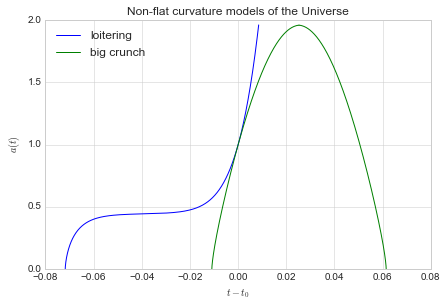

In [31]:
#creating the negative solutions for the scale factor

def dt2(a, omegas):
    m0, L0 = omegas;
    return -1/(H_0.value*np.sqrt((m0/a) + (1 - m0 - L0) + (L0*a**2)));

t_bigcrunch_backwards = [];

for val in a_space:
    t = quad(dt2,0,val,args=([0.3,-0.3]))[0];
    t_bigcrunch_backwards.append(t);
    
t_02 = quad(dt2,0,1,args=([0.3,-0.3]))[0];
for idx, val in enumerate(t_bigcrunch_backwards):
    t_bigcrunch_backwards[idx] = t_bigcrunch_backwards[idx] - t_02 + 2*T;
    
fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Non-flat curvature models of the Universe")
ax.set_xlabel("$t-t_0$")
ax.set_ylabel("$a(t)$")

ax.plot(t_loitering,a_space,label="loitering")
ax.plot(t_bigcrunch_forward,a_space,label="big crunch")
ax.plot(t_bigcrunch_backwards,a_space,color='g')
ax.legend(loc=2)

### 2. If a cluster of galaxies has a set of gravitational arcs, we can use these arcs to calculate the mass internal to the inscribed circle. If we assume an isothermal sphere, show that the velocity dispersion of the cluster is related to the angle of the arc in the image by:

(7) $$ \sigma_v \approx 10^3 km/s \: (\frac{\theta}{28"}\frac{D_S}{D_{LS}})^{1/2} $$

The mass within the Einstein Radius, $\theta_E$ is given by:

(8) $$ \theta_E = (\frac{4GM(<\theta_E)}{c^2}\frac{D_{LS}}{D_SD_L})^{1/2} $$

Squaring this and realizing that $M = \rho * V$ (volume), we can see that:

(9) $$ \theta_E^2 =  \frac{4G\rho (r) * V}{c^2}\frac{D_{LS}}{D_SD_L}$$

For an isothermal sphere, $\rho (r) = \frac{\sigma_v^2}{2\pi G r^2} $ and $V = \frac{4}{3}\pi r^3$, where $r = \theta_E$ so :

(10) $$ \theta_E^2 = \frac{4G *\sigma_v^2 * 4\pi \theta_E^3}{c^2 * 2\pi G \theta_E^2 * 3 }\frac{D_{LS}}{D_SD_L} $$

Simplifying: 

(11) $$ \theta_E^2 = \frac{8\sigma_v^2\theta_E}{3c^2}\frac{D_{LS}}{D_SD_L} $$

Isolating $\sigma_v$:

(12) $$ \sigma_v^2 = \frac{3c^2\theta_E}{8}\frac{D_SD_L}{D_{LS}} $$

Because of the small angle approximation we can assume that $\theta_E \approx \frac{\theta_E}{D_L}$, and replacing this we get that:

(13) $$ \sigma_v^2 \approx \frac{3c^2\theta_E}{8}\frac{D_S}{D_{LS}} $$

Replacing $c$ with $3\times10^5$ km/s:

(14) $$ \sigma_v^2 \approx (3\times10^{5}\:km/s)^2\frac{3\theta_E}{8}\frac{D_S}{D_{LS}} $$

Taking the square root of this and pulling out the $10^3$ km/s we get that:

(15) $$ \sigma_v \approx 10^3\:km/s (\frac{3\theta_E}{8*900}\frac{D_S}{D_{LS}})^{1/2}$$

Using the conversion factor from radians to arcseconds that 1 radian = 206265 arcseconds we can see that:

(16) $$ \sigma_v \approx 10^3\:km/s (\frac{\theta_E}{28"}\frac{D_S}{D_{LS}})^{1/2} $$